In [1]:
from pyTrajectory.config import cfg
from pyTrajectory.data_structures import Trajectory
from pyTrajectory.io import load_trajectories, load_data

In [2]:
cfg.trajectory_keys = ("pred_keypoints", "pred_classes", "time_stamp", "scores", "pred_boxes")
cfg.key_timestamp = "time_stamp"
cfg.key_box = "pred_boxes"
cfg.key_keypoints = "pred_keypoints"

In [3]:
trajectories = load_trajectories("/home/paul/Downloads/multi_contest_trial2_boxE_06Nov22_pt1-stripped.MP4-trajectories-corrected.h5")

In [4]:
trajectories

{'71': <pyTrajectory.data_structures.trajectory.Trajectory at 0x743b340db350>,
 '87': <pyTrajectory.data_structures.trajectory.Trajectory at 0x743abdd736e0>}

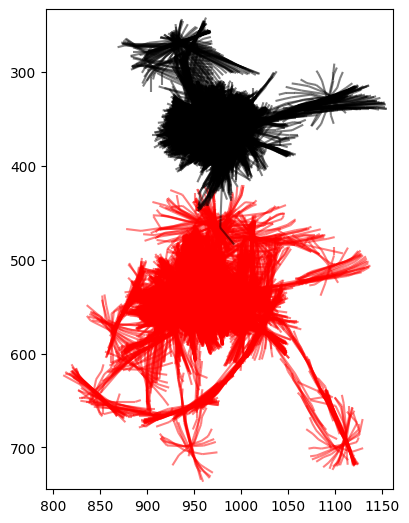

In [5]:
from pyTrajectory.visualization import get_trajectory_range
import pyTrajectory.features as ptf

from matplotlib import collections
import matplotlib.pyplot as plt

import numpy as np

xlim = []
ylim = []

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

for idx, (trajectory, color) in enumerate(zip(trajectories.values(), ["r", "k"])):
        
    xlim_t, ylim_t = get_trajectory_range(trajectory)
    xlim.append(xlim_t)
    ylim.append(ylim_t)
    
    segments = ptf.posture_segments(trajectory[::10], keypoint_pairs=((0, 1), (1, 2), (2, 3), (3, 4), (4, 5)))
    ax.add_collection(collections.LineCollection(segments.reshape(-1, 2, 2), alpha=0.5, color=color))

ax.set_xlim(min([x[0] for x in xlim]), max([x[1] for x in xlim]))
ax.set_ylim(min([y[0] for y in ylim]), max([y[1] for y in ylim]))

ax.set_aspect('equal')
ax.invert_yaxis()  # image y coordinates are "upside down"

plt.show()

In [6]:
t1 = trajectories["71"]
t2 = trajectories["87"]

In [7]:
from pyTrajectory.dataset import Dyad

In [10]:
t1, t2 = Dyad.prepare_trajectories(t1, t2)

In [12]:
t2.timestamps

array([10489., 10490., 10491., ..., 63657., 63658., 63659.])

interactive(children=(IntSlider(value=37500, description='timestamp', layout=Layout(width='800px'), max=43000,…

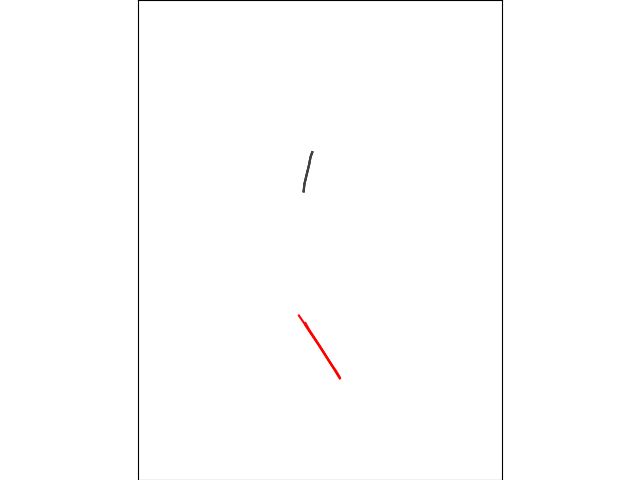

In [174]:
from ipywidgets import interact
import ipywidgets as widgets

import pyTrajectory.visualization as ptv

%matplotlib widget

def plot_pair(ax, timestamp, t1, t2, xlim, ylim):
    ax.clear()
    
    segments = ptf.posture_segments(t1[(timestamp - 10):(timestamp + 1):5], keypoint_pairs=(((0, 1), (1, 2), (2, 3), (3, 4), (4, 5))))  # [:20].reshape(-1, 2, 2)
    ax.add_collection(collections.LineCollection(segments.reshape(-1, 2, 2), color=(0.25, 0.25, 0.25)))
    # alpha=np.concatenate([np.repeat(0.1, 2000), np.linspace(0.1, 1, 401)])[::5]
    
    segments = ptf.posture_segments(t2[(timestamp - 10):(timestamp + 1):5], keypoint_pairs=(((0, 1), (1, 2), (2, 3), (3, 4), (4, 5))))  # [:20].reshape(-1, 2, 2)
    ax.add_collection(collections.LineCollection(segments.reshape(-1, 2, 2), color="r"))
    # alpha=np.concatenate([np.repeat(0.1, 2000), np.linspace(0.1, 1, 401)])[::5]
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])

plt.close("all")

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

xlim_1, ylim_1 = np.asarray(ptv.get_trajectory_range(t1))
xlim_1 = xlim_1 + np.diff(xlim_1) * (-0.1, 0.1)
ylim_1 = ylim_1 + np.diff(ylim_1) * (-0.1, 0.1)

xlim_2, ylim_2 = np.asarray(ptv.get_trajectory_range(t2))
xlim_2 = xlim_2 + np.diff(xlim_2) * (-0.1, 0.1)
ylim_2 = ylim_2 + np.diff(ylim_2) * (-0.1, 0.1)

xlim = min(xlim_1[0], xlim_2[0]), max(xlim_1[1], xlim_2[1])
ylim = min(ylim_1[0], ylim_2[0]), max(ylim_1[1], ylim_2[1])

slider = widgets.IntSlider(value=37500, min=33000, max=43000, layout=widgets.Layout(width="800px"))

interact(
    lambda timestamp: plot_pair(ax, timestamp, t1, t2, xlim, ylim),
    timestamp=slider
);

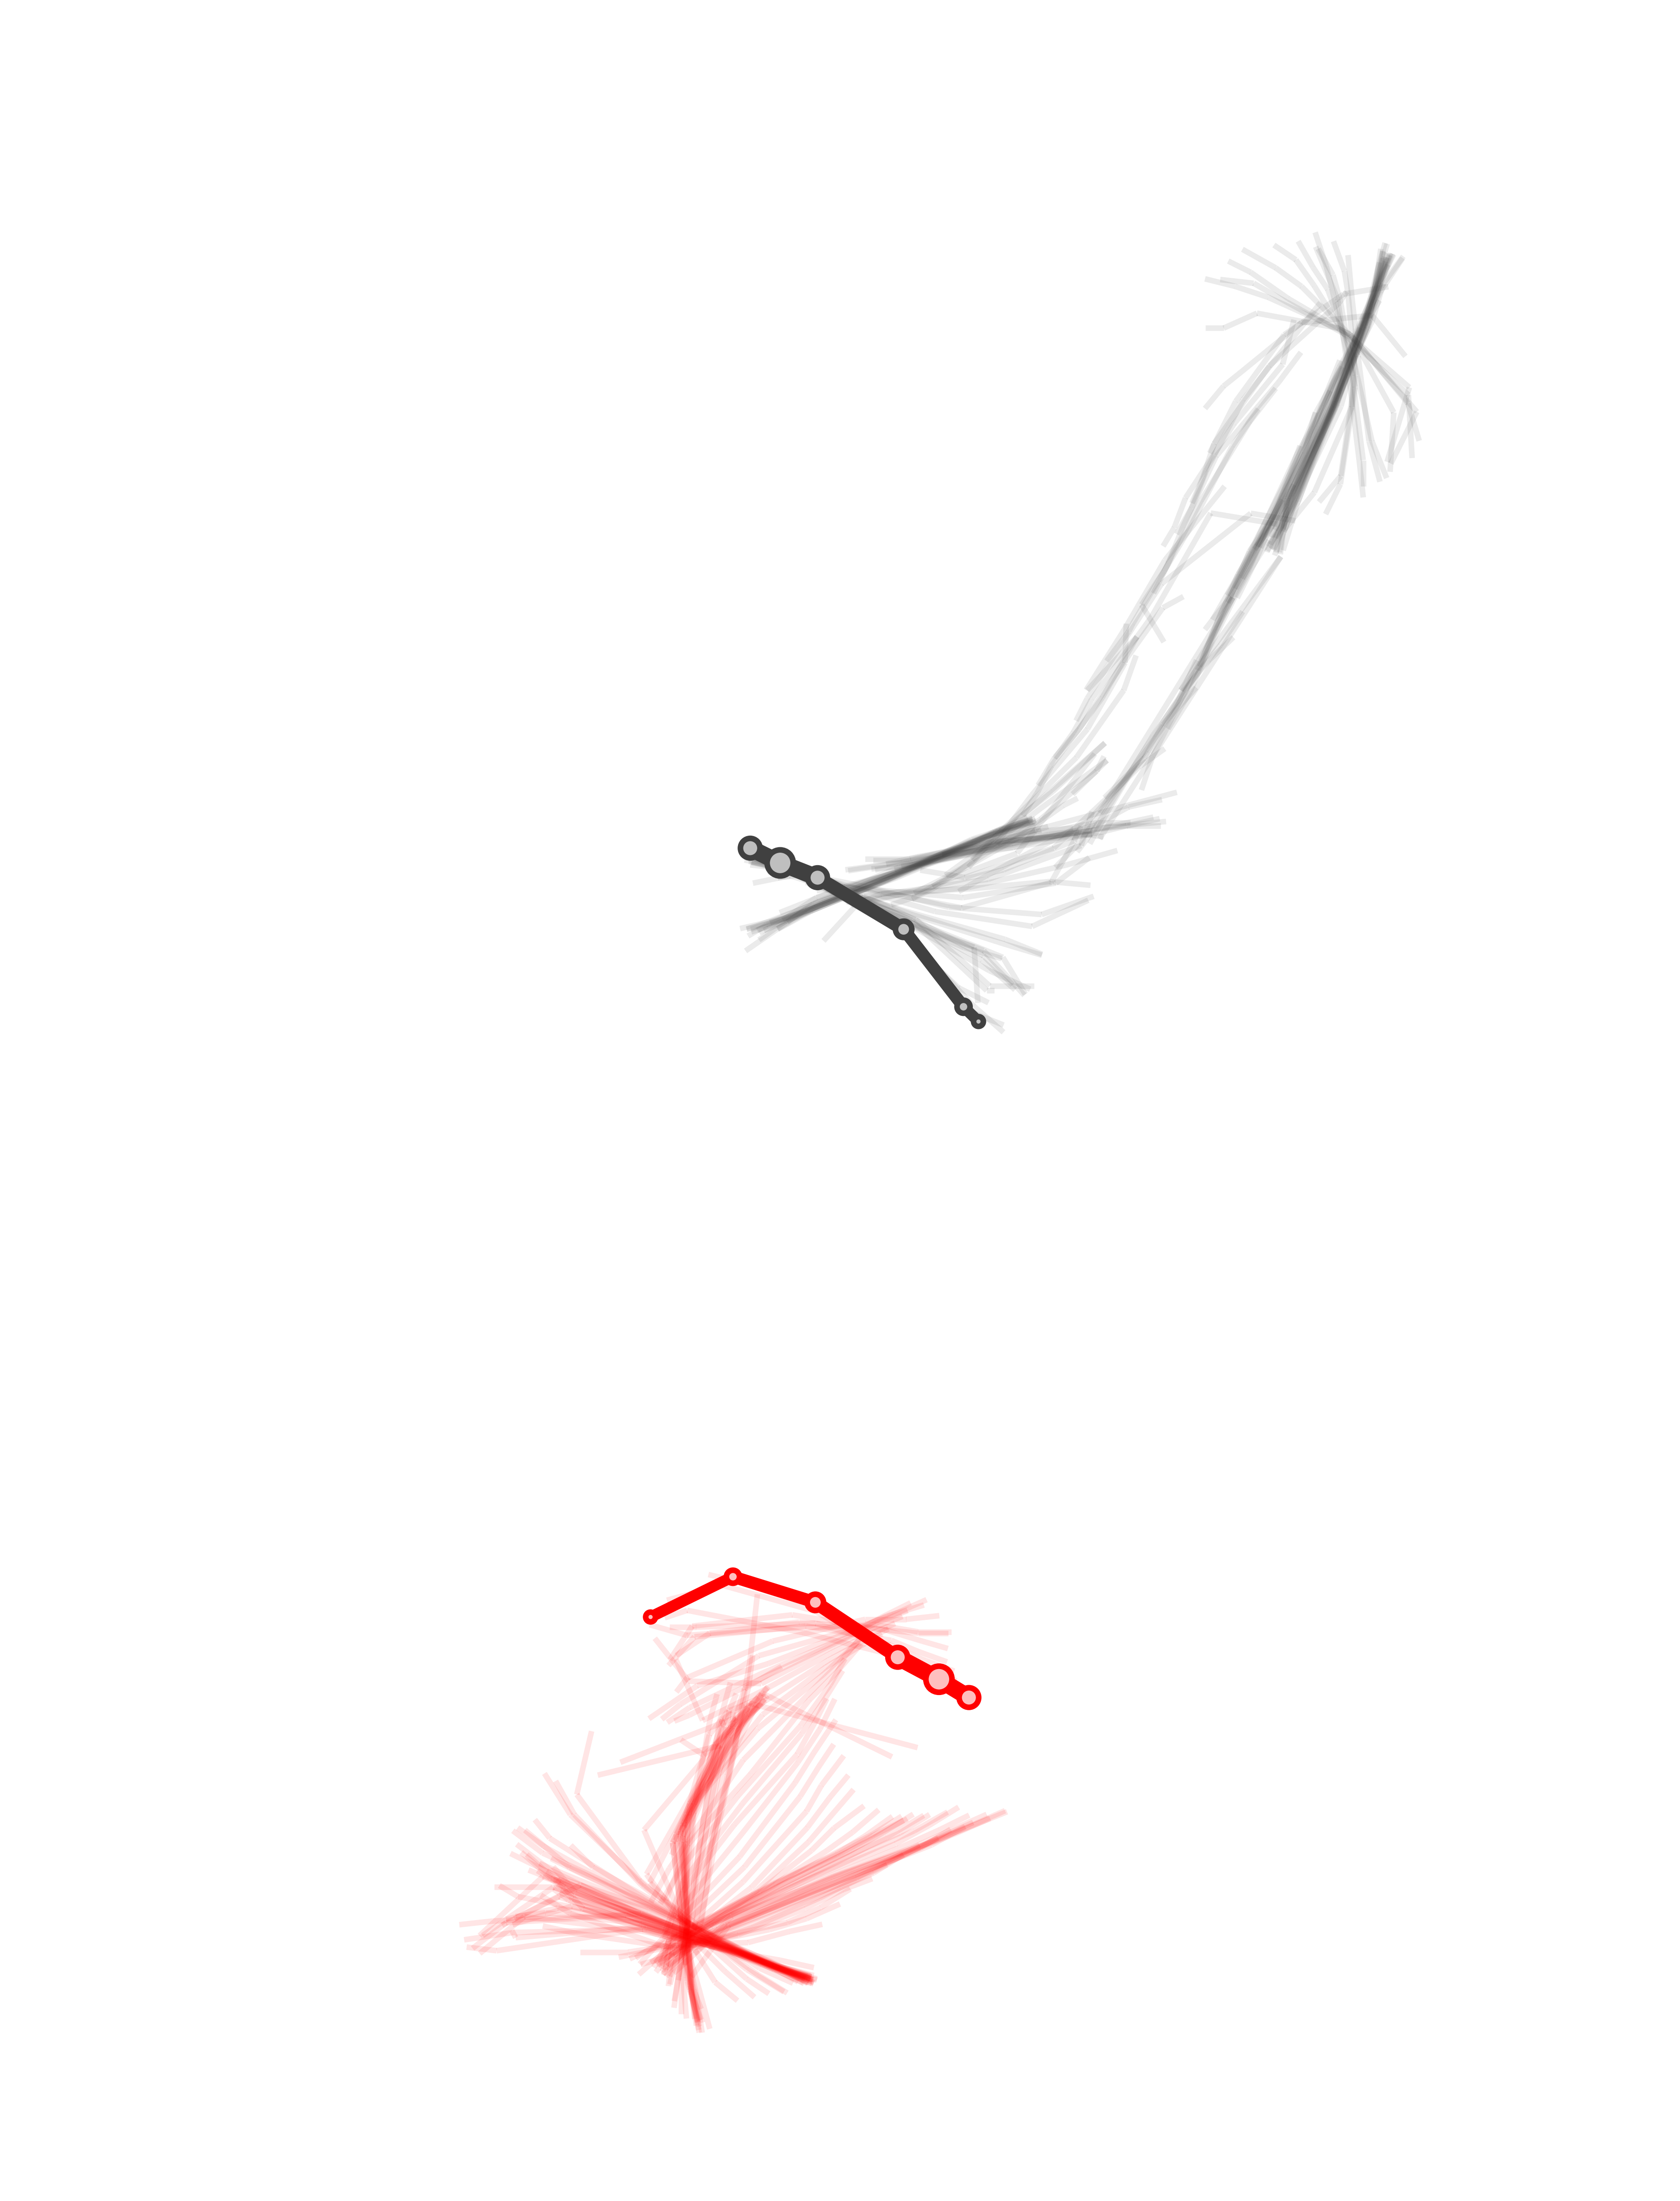

In [186]:
timestamp = 36506  # 23141  # 23280 # 23253

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.close("all")

fig = plt.figure(figsize=(8, 8), dpi=300)
ax = fig.add_axes([0, 0, 1, 1])

xlim_1, ylim_1 = np.asarray(ptv.get_trajectory_range(t1))
xlim_1 = xlim_1 + np.diff(xlim_1) * (-0.1, 0.1)
ylim_1 = ylim_1 + np.diff(ylim_1) * (-0.1, 0.1)

xlim_2, ylim_2 = np.asarray(ptv.get_trajectory_range(t2))
xlim_2 = xlim_2 + np.diff(xlim_2) * (-0.1, 0.1)
ylim_2 = ylim_2 + np.diff(ylim_2) * (-0.1, 0.1)

xlim = min(xlim_1[0], xlim_2[0]), max(xlim_1[1], xlim_2[1])
ylim = min(ylim_1[0], ylim_2[0]), max(ylim_1[1], ylim_2[1])

segment_widths = np.array([1.5, 1.5, 1.2, 1.1, 1]) * 3
radii = np.array([15, 20, 15, 12.5, 10, 7.5]) * 0.35

segments = ptf.posture_segments(t1[(timestamp - 1200):(timestamp + 1)], keypoint_pairs=(((0, 1), (1, 2), (2, 3), (3, 4), (4, 5))))
keypoints = ptf.keypoints(t1[(timestamp - 1200):(timestamp + 1)], keypoints=(0, 1, 2, 3, 4, 5))

ax.add_collection(
    collections.LineCollection(
        segments[::10].reshape(-1, 2, 2),
        alpha=0.1,
        color=(0.25, 0.25, 0.25),
    )
)

for segment_idx, segment in enumerate(segments[-1]):
    plt.plot(*segment.T, lw=segment_widths[segment_idx], solid_capstyle="round", c=(0.25, 0.25, 0.25), zorder=3)
plt.scatter(*keypoints[-1].T, s=radii ** 2, ec=(0.25, 0.25, 0.25), fc=(0.75, 0.75, 0.75), lw=1.5, zorder=3)

segments = ptf.posture_segments(t2[(timestamp - 1200):(timestamp + 1)], keypoint_pairs=(((0, 1), (1, 2), (2, 3), (3, 4), (4, 5))))
keypoints = ptf.keypoints(t2[(timestamp - 1200):(timestamp + 1)], keypoints=(0, 1, 2, 3, 4, 5))

ax.add_collection(
    collections.LineCollection(
        segments[::10].reshape(-1, 2, 2),
        alpha=0.1,
        color="r",
    )
)

for segment_idx, segment in enumerate(segments[-1]):
    plt.plot(*segment.T, lw=segment_widths[segment_idx], solid_capstyle="round", c="r", zorder=3)
plt.scatter(*keypoints[-1].T, s=radii ** 2, ec="r", fc=(1, 0.75, 0.75), lw=1.5, zorder=3)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_aspect("equal")
ax.axis("off")

plt.show()